In [1]:
# import positive
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np

import phenom

import lal
import lalsimulation as lalsim

import lalutils

In [3]:
import corner

In [4]:
import rompy as rp

In [33]:
import scrinet.fits

In [5]:
def subtract_linear(x, y, x1, x2):
    mask = (x >= x1) & (x <= x2)

    z = np.polyfit(x[mask], y[mask], 1)
    p = np.poly1d(z)

    newy = y - p(x)
    return newy

In [6]:
def gen1d(q_array, M=100, deltaF=1/8., f_min=30, f_max=200,
                         approximant=lalsim.IMRPhenomD, inclination=0):
    

    data = []
    coords = []
    
    for q in q_array:
        m1, m2 = phenom.m1_m2_M_q(M, q)
        pp = dict(m1=m1, m2=m2, deltaF=deltaF,
                  f_min=f_min, f_max=f_max,
                  inclination=inclination,
                  approximant=approximant
                 )
        p = lalutils.gen_wf_params(**pp)
        f, _, _, phase = lalutils.gen_wf(p)
        d = {"f":f, "phase":phase}
        
        data.append(d)
        coords.append([q])
        
    new_f = []
    new_y = []
    
    # subtract linear piece from phase
    f1 = f_min
    f2 = f_max
    for i in range(len(data)):
        f = data[i]['f']
        y = data[i]['phase']        
        
        new_f.append(f)        
        new_y.append(subtract_linear(f, y, f1, f2))

    n_f_points = len(new_f[0])
    n_waveforms = len(new_f)
    ts = np.zeros(shape=(n_waveforms, n_f_points))
    
    x = new_f[0]
    for i in range(n_waveforms):
        ts[i] = new_y[i]
        
    return x, ts, np.array(coords), ts[:,0]

In [7]:
def gen2d(q_array, spin1z_array, M=100, deltaF=1/8., f_min=30, f_max=200,
                         approximant=lalsim.IMRPhenomD, inclination=0):
    

    data = []
    coords = []
    
    for q in q_array:
        m1, m2 = phenom.m1_m2_M_q(M, q)
        for spin1z in spin1z_array:
            pp = dict(m1=m1, m2=m2, deltaF=deltaF,
                      f_min=f_min, f_max=f_max,
                      inclination=inclination,
                      approximant=approximant,
                      S1z=spin1z
                     )
            p = lalutils.gen_wf_params(**pp)
            f, _, _, phase = lalutils.gen_wf(p)
            d = {"f":f, "phase":phase}

            data.append(d)
            coords.append([q, spin1z])
        
    new_f = []
    new_y = []
    
    # subtract linear piece from phase
    f1 = f_min
    f2 = f_max
    for i in range(len(data)):
        f = data[i]['f']
        y = data[i]['phase']        
        
        new_f.append(f)        
        new_y.append(subtract_linear(f, y, f1, f2))

    n_f_points = len(new_f[0])
    n_waveforms = len(new_f)
    ts = np.zeros(shape=(n_waveforms, n_f_points))
    
    x = new_f[0]
    for i in range(n_waveforms):
        ts[i] = new_y[i]
        
    return x, ts, np.array(coords), ts[:,0]

In [8]:
def gen3d(q_array, spin1z_array, spin2z_array, M=100, deltaF=1/8., f_min=30, f_max=200,
                         approximant=lalsim.IMRPhenomD, inclination=0):
    

    data = []
    coords = []
    
    for q in q_array:
        m1, m2 = phenom.m1_m2_M_q(M, q)
        for spin1z in spin1z_array:
            for spin2z in spin2z_array:
                pp = dict(m1=m1, m2=m2, deltaF=deltaF,
                          f_min=f_min, f_max=f_max,
                          inclination=inclination,
                          approximant=approximant,
                          S1z=spin1z
                         )
                p = lalutils.gen_wf_params(**pp)
                f, _, _, phase = lalutils.gen_wf(p)
                d = {"f":f, "phase":phase}

                data.append(d)
                coords.append([q, spin1z, spin2z])
        
    new_f = []
    new_y = []
    
    # subtract linear piece from phase
    f1 = f_min
    f2 = f_max
    for i in range(len(data)):
        f = data[i]['f']
        y = data[i]['phase']        
        
        new_f.append(f)        
        new_y.append(subtract_linear(f, y, f1, f2))

    n_f_points = len(new_f[0])
    n_waveforms = len(new_f)
    ts = np.zeros(shape=(n_waveforms, n_f_points))
    
    x = new_f[0]
    for i in range(n_waveforms):
        ts[i] = new_y[i]
        
    return x, ts, np.array(coords), ts[:,0]

In [9]:
def gen4d(q_array, spin1z_array, spin2z_array, inclination_array, M=100, deltaF=1/8., f_min=30, f_max=200,
                         approximant=lalsim.IMRPhenomD):
    

    data = []
    coords = []
    
    for q in q_array:
        m1, m2 = phenom.m1_m2_M_q(M, q)
        for spin1z in spin1z_array:
            for spin2z in spin2z_array:
                for inclination in inclination_array:
                    pp = dict(m1=m1, m2=m2, deltaF=deltaF,
                              f_min=f_min, f_max=f_max,
                              inclination=inclination,
                              approximant=approximant,
                              S1z=spin1z
                             )
                    p = lalutils.gen_wf_params(**pp)
                    f, _, _, phase = lalutils.gen_wf(p)
                    d = {"f":f, "phase":phase}

                    data.append(d)
                    coords.append([q, spin1z, spin2z, inclination])
        
    new_f = []
    new_y = []
    
    # subtract linear piece from phase
    f1 = f_min
    f2 = f_max
    for i in range(len(data)):
        f = data[i]['f']
        y = data[i]['phase']        
        
        new_f.append(f)        
        new_y.append(subtract_linear(f, y, f1, f2))

    n_f_points = len(new_f[0])
    n_waveforms = len(new_f)
    ts = np.zeros(shape=(n_waveforms, n_f_points))
    
    x = new_f[0]
    for i in range(n_waveforms):
        ts[i] = new_y[i]
        
    return x, ts, np.array(coords), ts[:,0]

In [51]:
q_array = np.linspace(1, 10, 10)
x_1d, ts_1d, coords_1d, y_1d = gen1d(q_array)


q_array = np.random.uniform(1, 10, 100)
x_1d_val, ts_1d_val, coords_1d_val, y_1d_val = gen1d(q_array)

In [52]:
coords_1d

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

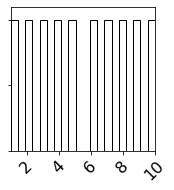

In [53]:
corner.corner(coords_1d);

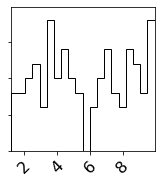

In [54]:
corner.corner(coords_1d_val);

In [55]:
y_1d

array([-6.79542613, -7.01852025, -7.29433623, -7.54021359, -7.77093266,
       -7.99544797, -8.21764761, -8.4391959 , -8.66080829, -8.88278539])

In [56]:
y_1d.shape

(10,)

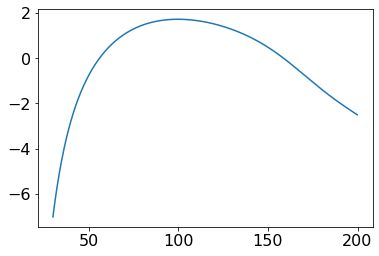

In [57]:
plt.figure()
plt.plot(x_1d, ts_1d[1])

In [58]:
q_array = np.linspace(1, 10, 5)
s1z_array = np.linspace(-1, 1, 5)
x_2d, ts_2d, coords_2d, y_2d = gen2d(q_array, s1z_array)


q_array = np.random.uniform(1, 10, 5)
s1z_array = np.random.uniform(-1, 1, 5)
x_2d_val, ts_2d_val, coords_2d_val, y_2d_val = gen2d(q_array, s1z_array)

In [59]:
coords_2d

array([[ 1.  , -1.  ],
       [ 1.  , -0.5 ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.5 ],
       [ 1.  ,  1.  ],
       [ 3.25, -1.  ],
       [ 3.25, -0.5 ],
       [ 3.25,  0.  ],
       [ 3.25,  0.5 ],
       [ 3.25,  1.  ],
       [ 5.5 , -1.  ],
       [ 5.5 , -0.5 ],
       [ 5.5 ,  0.  ],
       [ 5.5 ,  0.5 ],
       [ 5.5 ,  1.  ],
       [ 7.75, -1.  ],
       [ 7.75, -0.5 ],
       [ 7.75,  0.  ],
       [ 7.75,  0.5 ],
       [ 7.75,  1.  ],
       [10.  , -1.  ],
       [10.  , -0.5 ],
       [10.  ,  0.  ],
       [10.  ,  0.5 ],
       [10.  ,  1.  ]])

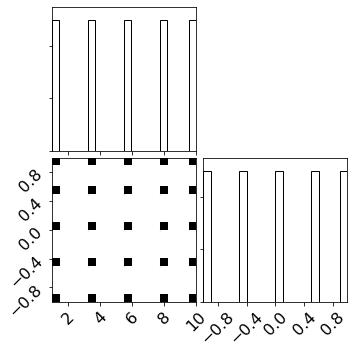

In [60]:
corner.corner(coords_2d);

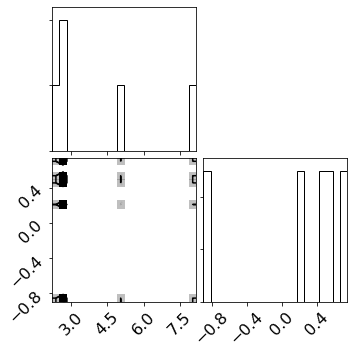

In [61]:
corner.corner(coords_2d_val);

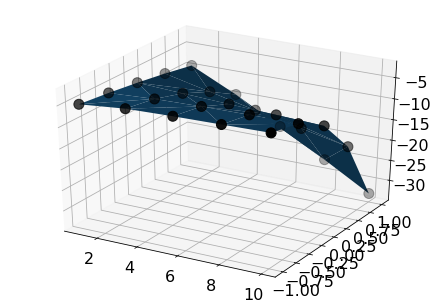

In [62]:
fig = plt.figure()
ax = Axes3D(fig)

ax.plot_trisurf(coords_2d[:,0], coords_2d[:,1], y_2d)
ax.scatter(coords_2d[:,0], coords_2d[:,1], y_2d, s=100, c='k')

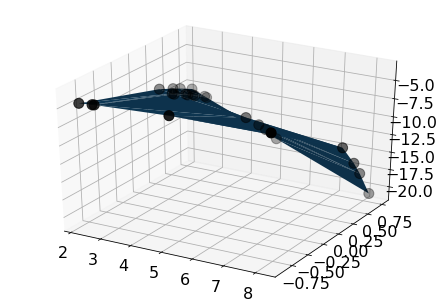

In [63]:
fig = plt.figure()
ax = Axes3D(fig)

ax.plot_trisurf(coords_2d_val[:,0], coords_2d_val[:,1], y_2d_val)
ax.scatter(coords_2d_val[:,0], coords_2d_val[:,1], y_2d_val, s=100, c='k')

In [64]:
q_array = np.linspace(1, 10, 8)
s1z_array = np.linspace(-1, 1, 8)
s2z_array = np.linspace(-1, 1, 8)
x_3d, ts_3d, coords_3d, y_3d = gen3d(q_array, s1z_array, s2z_array)


q_array = np.random.uniform(1, 10, 8)
s1z_array = np.random.uniform(-1, 1, 8)
s2z_array = np.random.uniform(-1, 1, 8)
x_3d_val, ts_3d_val, coords_3d_val, y_3d_val = gen3d(q_array, s1z_array, s2z_array)

In [65]:
coords_3d

array([[ 1.        , -1.        , -1.        ],
       [ 1.        , -1.        , -0.71428571],
       [ 1.        , -1.        , -0.42857143],
       ...,
       [10.        ,  1.        ,  0.42857143],
       [10.        ,  1.        ,  0.71428571],
       [10.        ,  1.        ,  1.        ]])

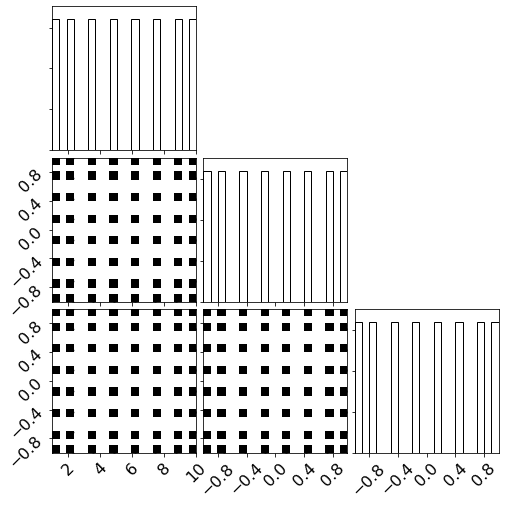

In [66]:
corner.corner(coords_3d);

In [67]:
q_array = np.linspace(1, 10, 5)
s1z_array = np.linspace(-1, 1, 5)
s2z_array = np.linspace(-1, 1, 5)
inc_array = np.linspace(0, np.pi, 5)
x_4d, ts_4d, coords_4d, y_4d = gen4d(q_array, s1z_array, s2z_array, inc_array)


q_array = np.random.uniform(1, 10, 5)
s1z_array = np.random.uniform(-1, 1, 5)
s2z_array = np.random.uniform(-1, 1, 5)
inc_array = np.random.uniform(0, np.pi, 5)
x_4d_val, ts_4d_val, coords_4d_val, y_4d_val = gen4d(q_array, s1z_array, s2z_array, inc_array)

In [68]:
coords_4d

array([[ 1.        , -1.        , -1.        ,  0.        ],
       [ 1.        , -1.        , -1.        ,  0.78539816],
       [ 1.        , -1.        , -1.        ,  1.57079633],
       ...,
       [10.        ,  1.        ,  1.        ,  1.57079633],
       [10.        ,  1.        ,  1.        ,  2.35619449],
       [10.        ,  1.        ,  1.        ,  3.14159265]])

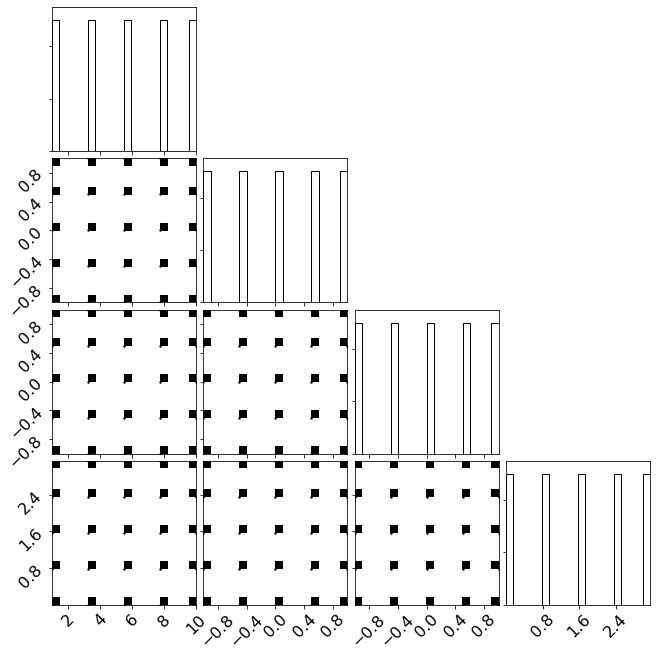

In [69]:
corner.corner(coords_4d);

# fitting 1-d data

In [70]:
import fits

In [71]:
fit_1d = fits.Fit(coords_1d, y_1d)

dimensionality of space = 1


In [72]:
# fit_1d.fit(method='linear')
fit_1d.fit(method='linear_grid')

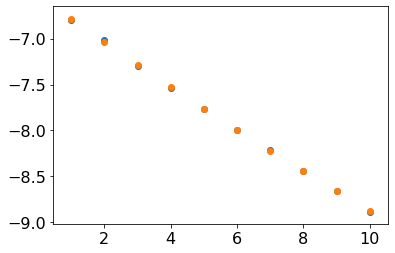

In [73]:
plt.figure()
plt.scatter(coords_1d, y_1d)
plt.scatter(coords_1d, fit_1d.eval(coords_1d))

In [74]:
fit_1d.eval(coords_1d) - y_1d

array([ 0.00674615, -0.02159564,  0.0076686 ,  0.01187842,  0.00581412,
       -0.00156975, -0.00638512, -0.00696764, -0.00260189,  0.00701276])

In [95]:
??rp.UnivariateFits

Init signature: rp.UnivariateFits(x, y, fit=None, params=None, **options)
Docstring:      <no docstring>
Source:        
class UnivariateFits(object):
  
  def __init__(self, x, y, fit=None, params=None, **options):
    self._dict = {
      'chebfit': self._chebfit,
      'curve_fit': self._curve_fit,
      'fourier': self._fourier,
      'greedy': self._greedy,  # TODO: Maybe make this an option for each fit type?
      'legfit': self._legfit,
      'localreg': self._local_regression,
      'odr': self._odr,
      'polyfit': self._polyfit,
      # 'romSpline': self._romSpline,
      'spline': self._spline,
      }
    self.fits = list(self._dict.keys())
    self._params = params
    
    if fit is None:
      raise Exception("No fit specified. Available fits listed in `fits` attribute.")
    else:
      self._fit = fit
      self.options = options
      
      # Perform the requested fit
      self._dict[fit](x, y, **options)
    
    self._x_dim = np.shape(x)
    self._y_dim = np.sha

In [98]:
# rpfit_1d = rp.UnivariateFits(coords_1d[:,0], y_1d, fit='localreg')
rpfit_1d = rp.UnivariateFits(coords_1d[:,0], y_1d, fit='polyfit', deg=2)

In [99]:
max_degs = scrinet.fits.poly.generate_degrees(maxdegs=[5])
snet_1d, _ = scrinet.fits.poly.findpolyfit(coords_1d[:,0].reshape(-1,1), y_1d, max_degs=max_degs, output_best=True)

lowest_deg for training set = 2
lowest loss for training set = 9.245164273253943e-05


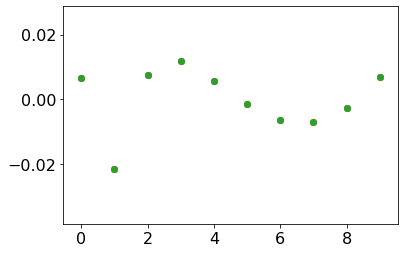

In [102]:
plt.figure()
plt.scatter(range(len(y_1d)), fit_1d.eval(coords_1d) - y_1d)

plt.scatter(range(len(y_1d)), rpfit_1d(coords_1d.ravel()) - y_1d)

plt.scatter(range(len(y_1d)), snet_1d.predict(coords_1d[:,0].reshape(-1,1)) - y_1d)


In [103]:
rpfit_1d_val = rp.UnivariateFits(coords_1d_val[:,0], y_1d_val, fit='localreg')

In [81]:
# %%time

# foo = positive.learning.gmvrfit(
#     coords_1d,
#     y_1d,
#     verbose=True,
#     plot=True,
#     show=True,
#     fitatol=1e-10,
#     maxdeg=5
# )

# # foo = positive.learning.gmvpfit(
# #     coords_1d,
# #     y_1d,
# #     verbose=True,
# #     plot=True,
# #     show=True,
# #     fitatol=1e-10,
# #     maxdeg=5
# # )

In [100]:
# gpr
import george
from george import kernels

Y = y_1d
X = coords_1d
yerr = np.zeros_like(Y)

kernel = np.var(Y) * kernels.ExpSquaredKernel(0.5, ndim=1, axes=0)
# kernel *= kernels.ExpSquaredKernel(0.5, ndim=2, axes=1)
gp = george.GP(kernel)
gp.compute(X, yerr)

In [83]:
%%time
import scipy.optimize as op

# Define the objective function (negative log-likelihood in this case).
def nll(p):
    gp.set_parameter_vector(p)
    ll = gp.log_likelihood(Y, quiet=True)
    
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_parameter_vector(p)

    
    return -gp.grad_log_likelihood(Y, quiet=True)

# You need to compute the GP once before starting the optimization.
gp.compute(X, yerr)

# Print the initial ln-likelihood.
print(gp.log_likelihood(Y))

# Run the optimization routine.
p0 = gp.get_parameter_vector()
results = op.minimize(nll, p0, jac=grad_nll, method="L-BFGS-B")

# Update the kernel and print the final log-likelihood.
gp.set_parameter_vector(results.x)
print(gp.log_likelihood(Y))

-288.0858164852827
0.18990794238472297
CPU times: user 39.6 ms, sys: 2.46 ms, total: 42.1 ms
Wall time: 40.8 ms


In [84]:
gp.get_parameter_dict()

OrderedDict([('kernel:k1:log_constant', 4.378144472493219),
             ('kernel:k2:metric:log_M_0_0', 5.81915732417442)])

In [89]:
pred, pred_var = gp.predict(Y, coords_1d_val)

In [90]:
grp_diff_val = pred - y_1d_val

In [91]:
fit_1d_val = fit_1d.eval(coords_1d_val) - y_1d_val
fit_1d_val_rpfit = rpfit_1d_val(coords_1d_val.ravel()) - y_1d_val

# fit_1d_positive_val = foo.eval(coords_1d_val) - y_1d_val

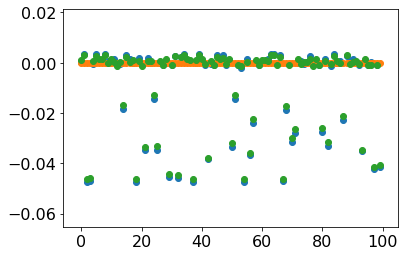

In [92]:
plt.figure()
plt.scatter(range(len(y_1d_val)), fit_1d_val)
plt.scatter(range(len(y_1d_val)), fit_1d_val_rpfit)

plt.scatter(range(len(y_1d_val)), grp_diff_val)

# plt.scatter(range(len(y_1d_val)), fit_1d_positive_val)

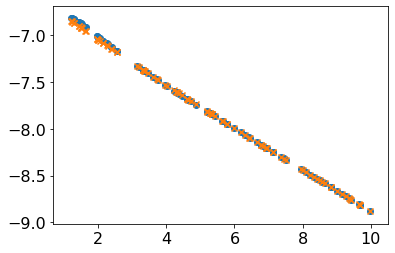

In [97]:
plt.figure()

plt.scatter(coords_1d_val, y_1d_val)
plt.scatter(coords_1d_val, pred, marker='x')


# fitting 2-d data

In [104]:
fit_2d = fits.Fit(coords_2d, y_2d)

dimensionality of space = 2


In [105]:
fit_2d.fit(method='linear', degree=3)

In [106]:
# fit_2d.fit(method='linear_grid', degree=10, cv=10)

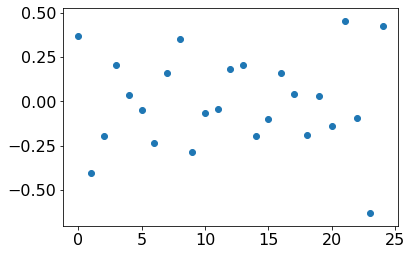

In [108]:
plt.figure()
plt.scatter(range(len(y_2d)), fit_2d.eval(coords_2d) - y_2d)

In [109]:
# %%time

# foo = positive.learning.gmvrfit(
#     coords_2d,
#     y_2d,
#     verbose=True,
#     plot=True,
#     show=True,
#     fitatol=1e-6,
#     maxdeg=5
# )

# # foo = positive.learning.gmvpfit(
# #     coords_2d,
# #     y_2d,
# #     verbose=True,
# #     plot=True,
# #     show=True,
# #     fitatol=1e-10,
# #     maxdeg=5
# # )

In [110]:
coords_2d.shape

(25, 2)

In [111]:
# polyfit2d = rp.MultivariateFits([coords_2d[:,0], coords_2d[:,1]], y_2d, fit='polyfit2d', deg=5)

In [112]:
def find_best_deg_from_validation():

    fits = []
    errors = []
    
    degs = range(10)
    
    for i, deg in enumerate(degs):

        polyfit2d = rp.MultivariateFits([coords_2d[:,0], coords_2d[:,1]], y_2d, fit='polyfit2d', deg=deg)
        
        
        yhat = polyfit2d([coords_2d_val[:,0], coords_2d_val[:,1]])
        error = np.sqrt(np.sum((yhat - y_2d_val)**2))
        errors.append(error)
        
        fits.append(polyfit2d)

    print(errors)
    min_idx = np.argmin(errors)
    print(f'best deg = {degs[min_idx]}')
    return fits[min_idx]
    

In [113]:
polyfit2d = find_best_deg_from_validation()

[20.34091011586187, 12.044130286846901, 4.189918778287482, 1.1850119642949657, 0.3093992706041621, 0.6345389198781763, 3.7403032579267554, 23.7072624952376, 165.30504075109397, 1155.6723901829926]
best deg = 4


In [115]:
len(y_2d)

25

In [116]:
coords_2d.shape

(25, 2)

In [193]:
max_degs = scrinet.fits.poly.generate_degrees(maxdegs=[5, 5])
snet_2d, best_idx = scrinet.fits.poly.findpolyfit(coords_2d, y_2d, max_degs=max_degs, output_best=True)

lowest_deg for training set = 19
lowest loss for training set = 0.4532810558026205


In [194]:
max_degs[best_idx]

array([1, 4])

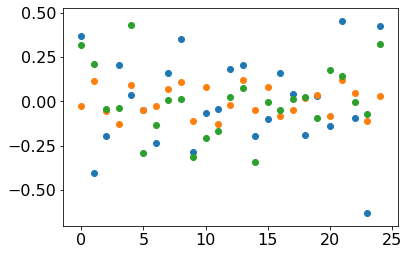

In [195]:
plt.figure()
plt.scatter(range(len(y_2d)), fit_2d.eval(coords_2d) - y_2d)
plt.scatter(range(len(y_2d)), polyfit2d([coords_2d[:,0], coords_2d[:,1]]) - y_2d)
plt.scatter(range(len(y_2d)), snet_2d.predict(coords_2d) - y_2d)

In [196]:
# gpr
import george
from george import kernels

Y = y_2d
X = coords_2d
yerr = np.zeros_like(Y)

kernel = np.var(Y) * kernels.ExpSquaredKernel(0.5, ndim=2)

# kernel = np.var(Y) * kernels.ExpSquaredKernel(0.5, ndim=2, axes=0)
# kernel *= kernels.ExpSquaredKernel(0.5, ndim=1, axes=1)
kernel += kernels.ExpSquaredKernel(0.5, ndim=2)
gp = george.GP(kernel)
gp.compute(X, yerr)

In [197]:
%%time
import scipy.optimize as op

# Define the objective function (negative log-likelihood in this case).
def nll(p):
    gp.set_parameter_vector(p)
    ll = gp.log_likelihood(Y, quiet=True)
    
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_parameter_vector(p)

    
    return -gp.grad_log_likelihood(Y, quiet=True)

# You need to compute the GP once before starting the optimization.
gp.compute(X, yerr)

# Print the initial ln-likelihood.
print(gp.log_likelihood(Y))

# Run the optimization routine.
p0 = gp.get_parameter_vector()
results = op.minimize(nll, p0, jac=grad_nll, method="L-BFGS-B")

# Update the kernel and print the final log-likelihood.
gp.set_parameter_vector(results.x)
print(gp.log_likelihood(Y))

-90.27463310759828
-57.59473499322924
CPU times: user 28 ms, sys: 1.74 ms, total: 29.7 ms
Wall time: 28.3 ms


In [198]:
gp.get_parameter_dict()

OrderedDict([('kernel:k1:k1:log_constant', 9.611377344605168),
             ('kernel:k1:k2:metric:log_M_0_0', 3.069703968867001),
             ('kernel:k2:metric:log_M_0_0', 0.025446579963044478)])

In [199]:
pred, pred_var = gp.predict(Y, coords_2d_val)

In [200]:
grp_diff_val = pred - y_2d_val

In [201]:
fit_2d_val = fit_2d.eval(coords_2d_val) - y_2d_val
# fit_2d_positive_val = foo.eval(coords_2d_val) - y_2d_val

fit_2d_rp_val = polyfit2d([coords_2d_val[:,0], coords_2d_val[:,1]]) - y_2d_val

In [202]:
scrinet_2d_val_diff = snet_2d.predict(coords_2d_val) - y_2d_val

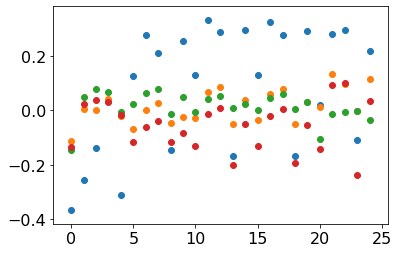

In [203]:
plt.figure()
plt.scatter(range(len(y_2d_val)), fit_2d_val)
# plt.scatter(range(len(y_2d_val)), fit_2d_positive_val)
plt.scatter(range(len(y_2d_val)), fit_2d_rp_val)

plt.scatter(range(len(y_2d_val)), grp_diff_val)

plt.scatter(range(len(y_2d_val)), scrinet_2d_val_diff)

# fitting 3-d data

In [204]:
fit_3d = fits.Fit(coords_3d, y_3d)

dimensionality of space = 3


In [205]:
fit_3d.fit(method='linear', degree=5)

In [206]:
def find_best_deg_from_validation_3d_sklearn():

    fitlist = []
    errors = []
    
    degs = range(3, 10)
    
    for i, deg in enumerate(degs):
        print(deg)
        fit_3d = fits.Fit(coords_3d, y_3d)
        fit_3d.fit(method='linear', degree=deg)
#         fit_3d.fit(method='linear_grid', degree=deg)
        
        
        
        yhat = fit_3d.eval(coords_3d_val)
        error = np.sqrt(np.sum((yhat - y_3d_val)**2))
        errors.append(error)
        
        fitlist.append(fit_3d)

    print(errors)
    min_idx = np.argmin(errors)
    print(f'best deg = {degs[min_idx]}')
    return fitlist[min_idx]
    

In [207]:
fit_3d = find_best_deg_from_validation_3d_sklearn()

3
dimensionality of space = 3
4
dimensionality of space = 3
5
dimensionality of space = 3
6
dimensionality of space = 3
7
dimensionality of space = 3
8
dimensionality of space = 3
9
dimensionality of space = 3
[3.7664673742735397, 1.5538828508234956, 0.5388450204478201, 0.2569833270477927, 0.18158922438425204, 0.21300363649910348, 0.21326431272251212]
best deg = 7


In [208]:
# %%time

# foo = positive.learning.gmvrfit(
#     coords_3d,
#     y_3d,
#     verbose=True,
#     plot=True,
#     show=True,
#     fitatol=1e-10,
#     maxdeg=8
# )

In [209]:
# %%time

# foop = positive.learning.gmvpfit(
#     coords_3d,
#     y_3d,
#     verbose=True,
#     plot=False,
#     show=True,
#     fitatol=1e-10,
#     maxdeg=8
# )

In [210]:
coords_3d.shape

(512, 3)

In [211]:
y_3d.shape

(512,)

In [212]:
# %%time

# foop = positive.learning.mvpolyfit(
#     coords_3d,
#     y_3d,
#     basis_symbols=['0','1','2', '00', '11', '22', '000', '111', '222', '01', '02', '001', '002']
# )

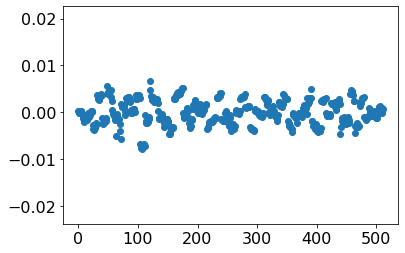

In [213]:
plt.figure()
plt.scatter(range(len(y_3d)), fit_3d.eval(coords_3d) - y_3d)
# plt.scatter(range(len(y_3d)), foop.eval(coords_3d) - y_3d)

In [214]:
polyfit3d = rp.MultivariateFits([coords_3d[:,0], coords_3d[:,1], coords_3d[:,2]], y_3d, fit='polyfit3d', deg=6)

In [215]:
# polyfit3d.CrossValidation.Kfold_ensemble([coords_3d[:,0], coords_3d[:,1], coords_3d[:,2]], y_3d, n=100)

In [244]:
# gpr
import george
from george import kernels

Y = y_3d
X = coords_3d
yerr = np.zeros_like(Y)+1e-2

kernel = np.var(Y) * kernels.ExpSquaredKernel(0.5, ndim=3, axes=0)

# kernel = np.var(Y) * kernels.ExpSquaredKernel(0.5, ndim=2, axes=0)
# kernel *= kernels.ExpSquaredKernel(0.5, ndim=1, axes=1)
kernel *= kernels.ExpSquaredKernel(0.5, ndim=3, axes=1)
kernel *= kernels.ExpSquaredKernel(0.5, ndim=3, axes=2)
gp = george.GP(kernel)
gp.compute(X, yerr)

In [245]:
%%time
import scipy.optimize as op

# Define the objective function (negative log-likelihood in this case).
def nll(p):
    gp.set_parameter_vector(p)
    ll = gp.log_likelihood(Y, quiet=True)
    
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_parameter_vector(p)

    
    return -gp.grad_log_likelihood(Y, quiet=True)

# You need to compute the GP once before starting the optimization.
gp.compute(X, yerr)

# Print the initial ln-likelihood.
print(gp.log_likelihood(Y))

# Run the optimization routine.
p0 = gp.get_parameter_vector()
# results = op.minimize(nll, p0, jac=grad_nll, method="L-BFGS-B")
results = op.minimize(nll, p0, method="L-BFGS-B")

# Update the kernel and print the final log-likelihood.
gp.set_parameter_vector(results.x)
print(gp.log_likelihood(Y))

95.03746646438503
1642.0935784226417
CPU times: user 4.51 s, sys: 31.4 ms, total: 4.55 s
Wall time: 1.15 s


In [246]:
gp.get_parameter_dict()

OrderedDict([('kernel:k1:k1:k1:log_constant', 6.789053547680504),
             ('kernel:k1:k1:k2:metric:log_M_0_0', 4.46432186146199),
             ('kernel:k1:k2:metric:log_M_0_0', 0.24539259108398653),
             ('kernel:k2:metric:log_M_0_0', 16.045968147099856)])

In [262]:
pred, pred_var = gp.predict(Y, coords_3d)

In [263]:
max_degs = scrinet.fits.poly.generate_degrees(maxdegs=[12,12,12])
snet_3d, best_idx = scrinet.fits.poly.findpolyfit(coords_3d, y_3d, max_degs=max_degs, output_best=True)

lowest_deg for training set = 419
lowest loss for training set = 0.0034183727851277695


In [264]:
max_degs[best_idx]

array([5, 7, 0])

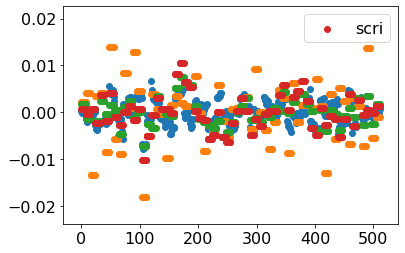

In [265]:
plt.figure()
plt.scatter(range(len(y_3d)), fit_3d.eval(coords_3d) - y_3d)
plt.scatter(range(len(y_3d)), polyfit3d([coords_3d[:,0], coords_3d[:,1], coords_3d[:,2]]) - y_3d)

plt.scatter(range(len(y_3d)), pred - y_3d)

plt.scatter(range(len(y_3d)), snet_3d.predict(coords_3d) - y_3d, label='scri')
plt.legend()

In [266]:
pred, pred_var = gp.predict(Y, coords_3d_val)

In [267]:
grp_diff_val = pred - y_3d_val

In [268]:
fit_3d_val = fit_3d.eval(coords_3d_val) - y_3d_val
# fit_3d_positive_val = foo.eval(coords_3d_val) - y_3d_val
# fit_3d_positive_foop_val = foop.eval(coords_3d_val) - y_3d_val

fit_3d_rp_val = polyfit3d([coords_3d_val[:,0], coords_3d_val[:,1], coords_3d_val[:,2]]) - y_3d_val

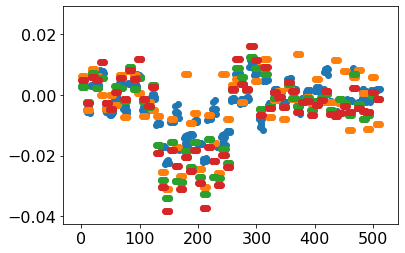

In [269]:
plt.figure()
plt.scatter(range(len(y_3d_val)), fit_3d_val)
# plt.scatter(range(len(y_3d_val)), fit_3d_positive_val)
# plt.scatter(range(len(y_3d_val)), fit_3d_positive_foop_val)

plt.scatter(range(len(y_3d_val)), fit_3d_rp_val)

plt.scatter(range(len(y_3d_val)), grp_diff_val)

plt.scatter(range(len(y_3d_val)), snet_3d.predict(coords_3d_val) - y_3d_val)

# fitting 4-d data

In [270]:
fit_4d = fits.Fit(coords_4d, y_4d)

dimensionality of space = 4


In [271]:
# fit_4d.fit(method='bayesian', degree=6)

In [272]:
fit_4d.fit(method='linear', degree=5)

In [273]:
# fit_4d.fit(method='linear_grid', degree=4, cv=10)

In [274]:
def find_best_deg_from_validation_4d_sklearn():

    fitlist = []
    errors = []
    
    degs = range(3, 10)
    
    for i, deg in enumerate(degs):
        print(deg)
        fit_4d = fits.Fit(coords_4d, y_4d)
        fit_4d.fit(method='linear', degree=deg)
        
        
        
        yhat = fit_4d.eval(coords_4d_val)
        error = np.sqrt(np.sum((yhat - y_4d_val)**2))
        errors.append(error)
        
        fitlist.append(fit_4d)

    print(errors)
    min_idx = np.argmin(errors)
    print(f'best deg = {degs[min_idx]}')
    return fitlist[min_idx]
    

In [275]:
fit_4d = find_best_deg_from_validation_4d_sklearn()

3
dimensionality of space = 4
4
dimensionality of space = 4
5
dimensionality of space = 4
6
dimensionality of space = 4
7
dimensionality of space = 4
8
dimensionality of space = 4
9
dimensionality of space = 4
[6.460657428039458, 2.1651640168340496, 1.5354234911654423, 3.0662453652556874, 6.783920452861692, 31.582172807194844, 241.80455955475327]
best deg = 5


In [346]:
coords_4d.shape

(625, 4)

In [347]:
y_4d.shape

(625,)

In [384]:
polyfit4d = rp.MultivariateFits([coords_4d[:,0], coords_4d[:,1], coords_4d[:,2], coords_4d[:,3]], y_4d, fit='polyfit4d', deg=4)

In [385]:
# gpr
import george
from george import kernels

Y = y_4d
X = coords_4d
yerr = np.zeros_like(Y)+1e-2

kernel = np.var(Y) * kernels.ExpSquaredKernel(0.5, ndim=4, axes=0)

# kernel = np.var(Y) * kernels.ExpSquaredKernel(0.5, ndim=2, axes=0)
# kernel *= kernels.ExpSquaredKernel(0.5, ndim=1, axes=1)
kernel *= kernels.ExpSquaredKernel(0.5, ndim=4, axes=1)
kernel *= kernels.ExpSquaredKernel(0.5, ndim=4, axes=2)
kernel *= kernels.ExpSquaredKernel(0.5, ndim=4, axes=3)
gp = george.GP(kernel)
gp.compute(X, yerr)

In [386]:
%%time
import scipy.optimize as op

# Define the objective function (negative log-likelihood in this case).
def nll(p):
    gp.set_parameter_vector(p)
    ll = gp.log_likelihood(Y, quiet=True)

#     pred, pred_var = gp.predict(Y, coords_4d_val)
#     ll = -np.log((np.max(pred - y_4d_val)**2))
    
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_parameter_vector(p)

    
    return -gp.grad_log_likelihood(Y, quiet=True)

# You need to compute the GP once before starting the optimization.
gp.compute(X, yerr)

# Print the initial ln-likelihood.
print(gp.log_likelihood(Y))

# Run the optimization routine.
p0 = gp.get_parameter_vector()
results = op.minimize(nll, p0, jac=grad_nll, method="L-BFGS-B")
# results = op.minimize(nll, p0, method="L-BFGS-B")

# Update the kernel and print the final log-likelihood.
gp.set_parameter_vector(results.x)
print(gp.log_likelihood(Y))

-1187.8618012205734
2143.110629749937
CPU times: user 17.1 s, sys: 210 ms, total: 17.3 s
Wall time: 4.39 s


In [387]:
gp.get_parameter_dict()

OrderedDict([('kernel:k1:k1:k1:k1:log_constant', 5.827211568453258),
             ('kernel:k1:k1:k1:k2:metric:log_M_0_0', 4.489992209741928),
             ('kernel:k1:k1:k2:metric:log_M_0_0', 0.6100976498412541),
             ('kernel:k1:k2:metric:log_M_0_0', 37.415372880321186),
             ('kernel:k2:metric:log_M_0_0', 34.59431795969423)])

In [420]:
pred, pred_var = gp.predict(Y, coords_4d)

In [400]:
coords_4d.shape

(625, 4)

In [401]:
max_degs

array([[0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 2],
       ...,
       [0, 7, 1, 0],
       [1, 7, 0, 0],
       [0, 8, 0, 0]])

In [402]:
max_degs = scrinet.fits.poly.generate_degrees(maxdegs=[9,9,9,9])
snet_4d, best_idx = scrinet.fits.poly.findpolyfit(coords_4d, y_4d, max_degs=max_degs, output_best=True)

lowest_deg for training set = 644
lowest loss for training set = 0.026819781970649943


In [403]:
max_degs[best_idx]

array([5, 4, 0, 0])

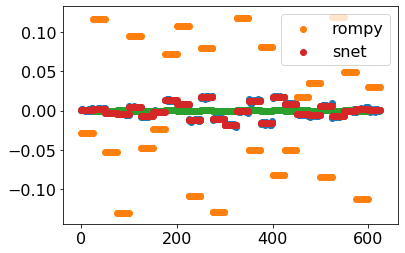

In [422]:
plt.figure()
plt.scatter(range(len(y_4d)), fit_4d.eval(coords_4d) - y_4d)

plt.scatter(range(len(y_4d)), polyfit4d([coords_4d[:,0], coords_4d[:,1], coords_4d[:,2], coords_4d[:,3]]) - y_4d, label='rompy')

plt.scatter(range(len(y_4d)), pred - y_4d)
plt.scatter(range(len(y_4d)), snet_4d.predict(coords_4d) - y_4d, label='snet')
plt.legend()

In [406]:
fit_4d_val = fit_4d.eval(coords_4d_val) - y_4d_val

In [407]:
pred, pred_var = gp.predict(Y, coords_4d_val)

In [408]:
grp_diff_val = pred - y_4d_val

In [409]:
snet_4d_diff_val = snet_4d.predict(coords_4d_val) - y_4d_val

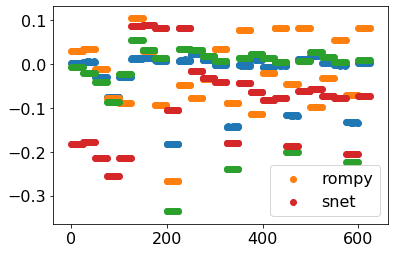

In [419]:
plt.figure()
plt.scatter(range(len(y_4d_val)), fit_4d_val)
plt.scatter(range(len(y_4d_val)), polyfit4d([coords_4d_val[:,0], coords_4d_val[:,1], coords_4d_val[:,2], coords_4d_val[:,3]]) - y_4d_val, label='rompy')
plt.scatter(range(len(y_4d_val)), grp_diff_val)
plt.scatter(range(len(y_4d_val)), snet_4d_diff_val, label='snet')
plt.legend()